# PENJUALAN RUMAH JAKARTA SELATAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns 
plt.style.use('seaborn')
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Anggiboy/RegressionProject/main/HARGA%20RUMAH%20JAKSEL2.csv',sep=';')
df

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL
...,...,...,...,...,...,...,...
996,16000000000,488,550,6,5,ADA,JAKSEL
997,4500000000,209,270,4,4,ADA,JAKSEL
998,29000000000,692,400,4,3,TIDAK ADA,JAKSEL
999,1700000000,102,140,4,3,TIDAK ADA,JAKSEL


# Deskripsi Data

Contect 
  
  Dataset Harga Rumah merupakan daftar harga rumah , yaitu data harga rumah daerah Jaksel. Data diambil dan dikumpulkan dari website penjualanrumah yaitu rumah123.com

Content:

  Dataset harga rumah jaksel terdiri dari 7 kolom dengan jumlah data yaitu 1001 data. Kolom tersebut terdiri dari :

* HARGA : harga dari rumah.
* LT    : jumlah luas tanah.
* LB    : jumlah luas bangunan tingkat dan tidak.
* JKT   : jumlah kamar tidur.
* JKM   : jumlah kamar mandi.
* GRS   : Garasi -> ada/tidak ada
* KOTA  : nama kota.



# EDA (Exploratory Data Analysis)


## Variabel Dataset

In [ ]:
df.shape #menjelaskan jumlah baris dan kolom

(1001, 7)

In [ ]:
df.columns # menjelaskan nama kolom

Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA'], dtype='object')

In [ ]:
df.info() #menjekaskan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


## Mengecek Missing Data

In [ ]:
df.isnull().sum()

HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
KOTA     0
dtype: int64

## Deskripsi Data

In [ ]:
df.describe()

,HARGA,LT,LB,JKT,JKM
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000


In [ ]:
df['HARGA']=(df['HARGA']/250000000000)
df

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,0.1120,1100,700,5,6,ADA,JAKSEL
1,0.0760,824,800,4,4,ADA,JAKSEL
2,0.0188,500,400,4,3,ADA,JAKSEL
3,0.0196,251,300,5,4,ADA,JAKSEL
4,0.1120,1340,575,4,5,ADA,JAKSEL
...,...,...,...,...,...,...,...
996,0.0640,488,550,6,5,ADA,JAKSEL
997,0.0180,209,270,4,4,ADA,JAKSEL
998,0.1160,692,400,4,3,TIDAK ADA,JAKSEL
999,0.0068,102,140,4,3,TIDAK ADA,JAKSEL


## Plot Sebelum Cleaning

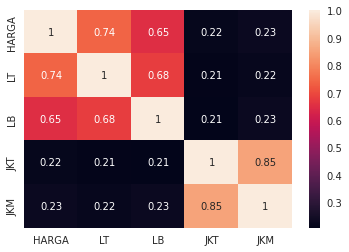

In [ ]:
corrmatrix = df.corr()
sns.heatmap(corrmatrix, annot=True)
plt.savefig('corelasi.png')
plt.show()

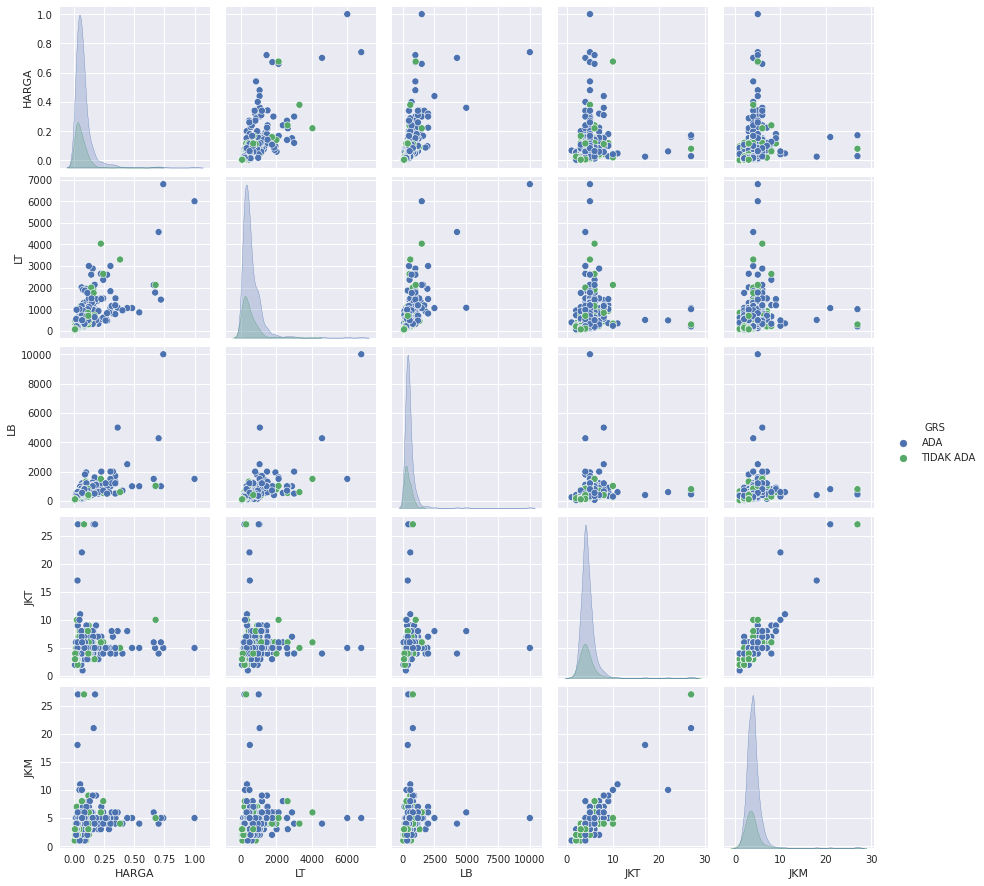

In [ ]:
g = sns.pairplot(df, hue='GRS')

# Pre-processing

## Menganalisi variabel numerik

In [ ]:
numerik = [var for var in df.columns if df[var].dtype!='O']
print('Ada {} variabel numerik'.format(len(numerik)))
print('Variabel numeriknya adalah :', numerik)

Ada 5 variabel numerik
Variabel numeriknya adalah : ['HARGA', 'LT', 'LB', 'JKT', 'JKM']


In [ ]:
df[numerik].head(10)

,HARGA,LT,LB,JKT,JKM
0,0.11200,1100,700,5,6
1,0.07600,824,800,4,4
2,0.01880,500,400,4,3
3,0.01960,251,300,5,4
4,0.11200,1340,575,4,5
5,0.04000,460,300,4,4
6,0.03040,278,350,4,4
7,0.02100,511,300,3,2
8,0.00268,70,69,3,2
9,0.00192,66,42,2,1


In [ ]:
df[numerik].isnull().sum() #mengecek missing value

HARGA    0
LT       0
LB       0
JKT      0
JKM      0
dtype: int64

## Menganalisis Variabel Kategorik

In [ ]:
kategorik = [var for var in df.columns if df[var].dtype=='O']
print('Ada {} variabel kategorik'.format(len(kategorik)))
print('Variabel kategoriknya yaitu :', kategorik)

Ada 2 variabel kategorik
Variabel kategoriknya yaitu : ['GRS', 'KOTA']


In [ ]:
df[kategorik].head(10)

,GRS,KOTA
0,ADA,JAKSEL
1,ADA,JAKSEL
2,ADA,JAKSEL
3,ADA,JAKSEL
4,ADA,JAKSEL
5,ADA,JAKSEL
6,ADA,JAKSEL
7,ADA,JAKSEL
8,TIDAK ADA,JAKSEL
9,TIDAK ADA,JAKSEL


In [ ]:
df[kategorik].isnull().sum() #mengecek missing value

GRS     0
KOTA    0
dtype: int64

### Drop Data 

In [ ]:
df = df.drop(['KOTA'], axis=1)
df

,HARGA,LT,LB,JKT,JKM,GRS
0,0.1120,1100,700,5,6,ADA
1,0.0760,824,800,4,4,ADA
2,0.0188,500,400,4,3,ADA
3,0.0196,251,300,5,4,ADA
4,0.1120,1340,575,4,5,ADA
...,...,...,...,...,...,...
996,0.0640,488,550,6,5,ADA
997,0.0180,209,270,4,4,ADA
998,0.1160,692,400,4,3,TIDAK ADA
999,0.0068,102,140,4,3,TIDAK ADA


## Label


In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['GRS'] = label_encoder.fit_transform(df['GRS'])
df

,HARGA,LT,LB,JKT,JKM,GRS
0,0.1120,1100,700,5,6,0
1,0.0760,824,800,4,4,0
2,0.0188,500,400,4,3,0
3,0.0196,251,300,5,4,0
4,0.1120,1340,575,4,5,0
...,...,...,...,...,...,...
996,0.0640,488,550,6,5,0
997,0.0180,209,270,4,4,0
998,0.1160,692,400,4,3,1
999,0.0068,102,140,4,3,1


# Decision Tree Regression

In [ ]:
X=df[['LT','LB','JKT','JKM','GRS']].values.reshape(-1,5)
y=df['HARGA'].values.reshape(-1,1)

In [ ]:
X

array([[1100,  700,    5,    6,    0],
       [ 824,  800,    4,    4,    0],
       [ 500,  400,    4,    3,    0],
       ...,
       [ 692,  400,    4,    3,    1],
       [ 102,  140,    4,    3,    1],
       [  63,  110,    3,    3,    1]])

In [ ]:
y

array([[0.112 ],
       [0.076 ],
       [0.0188],
       ...,
       [0.116 ],
       [0.0068],
       [0.005 ]])

In [ ]:
# Memisahkan dataset ke dalam set Pelatihan dan set Tes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import cross_val_predict

score = cross_val_predict(regressor,X,y)
print(score)
np.mean(score)

[0.062  0.092  0.04   ... 0.056  0.0112 0.0112]


0.07185458874458875

In [ ]:
regressor.score(X_test,y_test)

0.9996571262582475

In [ ]:
y_pred = regressor.predict(X_test)
y_pred_reshaped=np.reshape(y_pred,(201))
y_test_reshaped=np.reshape(y_test,(201))
result = pd.DataFrame({'prediksi':y_pred_reshaped,'aktual':y_test_reshaped}).astype(float)
result*250000000000
result.to_csv()

,prediksi,aktual
0,5.725000e+09,5.800000e+09
1,9.500000e+08,9.500000e+08
2,1.400000e+10,1.400000e+10
3,1.150000e+10,1.150000e+10
4,3.500000e+10,3.500000e+10
...,...,...
196,4.500000e+09,4.500000e+09
197,1.300000e+10,1.300000e+10
198,1.450000e+10,1.450000e+10
199,5.500000e+10,5.500000e+10


In [ ]:
from sklearn import metrics
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 0.00018059701492537317
Mean Absolute Percentage Error 0.0041610115527281055
Mean Squared Error 2.483841901603097e-06
Root Mean Squared Error 0.0015760209077303185


In [ ]:
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_1 <= 984.00
|   |--- feature_0 <= 548.50
|   |   |--- feature_0 <= 280.00
|   |   |   |--- feature_1 <= 220.50
|   |   |   |   |--- feature_0 <= 94.50
|   |   |   |   |   |--- feature_1 <= 182.50
|   |   |   |   |   |   |--- feature_1 <= 62.50
|   |   |   |   |   |   |   |--- feature_1 <= 56.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 28.50
|   |   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  28.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 49.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  49.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 51.00
|   |   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |  

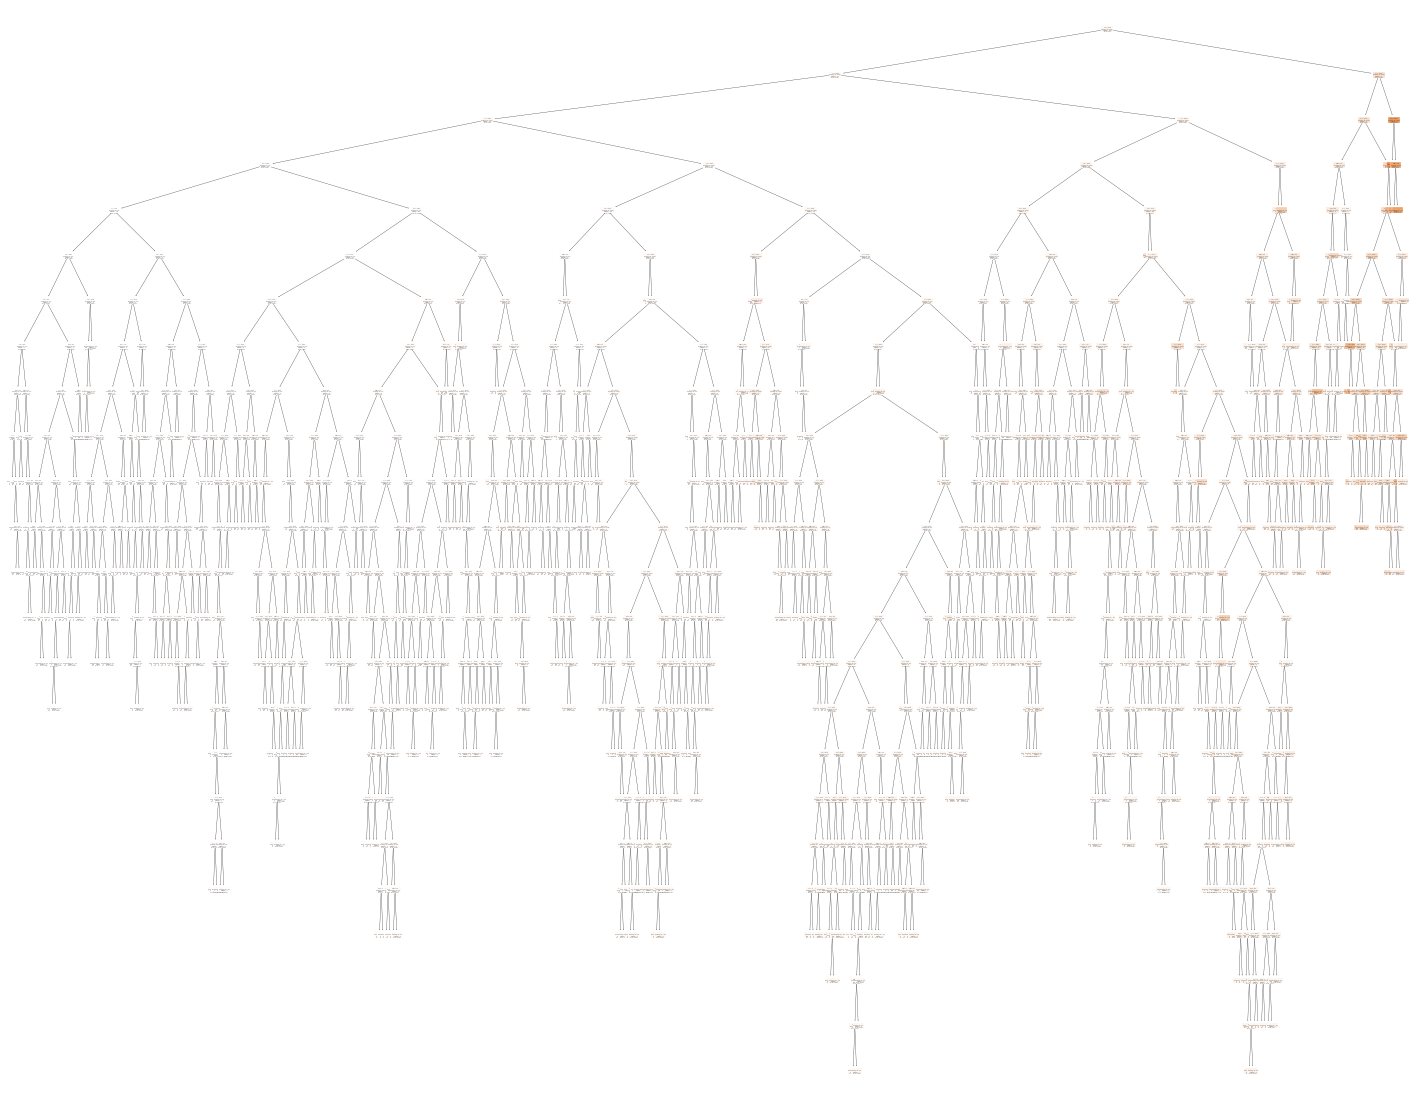

In [ ]:
fn =['LT','LB','JKT','JKM','GRS']
cn = ['HARGA']

fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(regressor,feature_names=fn, class_names=cn,filled=True)

##Plot Setelah di Cleaning


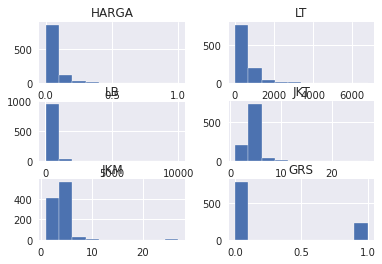

In [ ]:
df.hist()
plt.savefig('histogram.png')
plt.show()

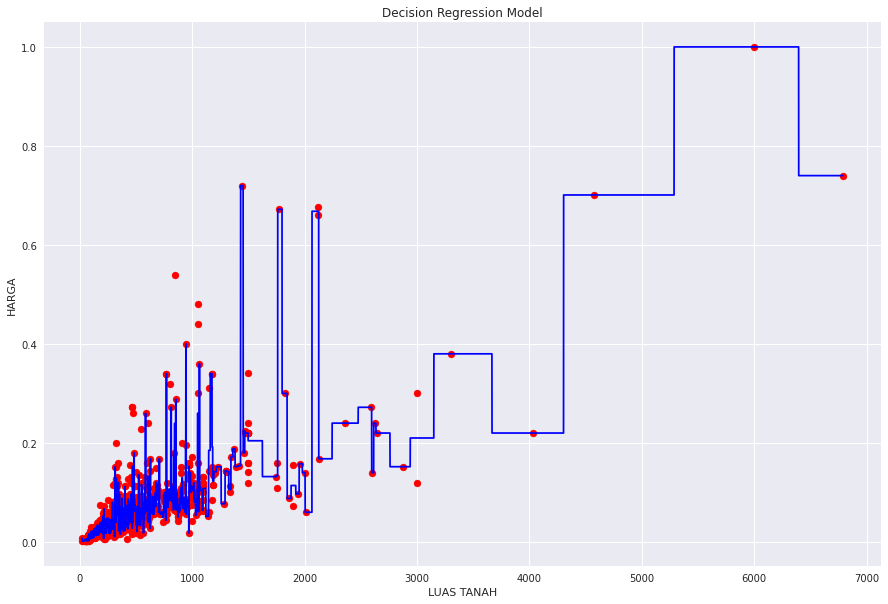

In [ ]:
regressor_contoh = DecisionTreeRegressor()

regressor_contoh.fit(df[['LT']].values,df['HARGA'].values)

plt.figure(figsize=(15,10))
X_grid = np.arange(min(df['LT'].values), max(df['LT'].values))
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(df['LT'].values,df['HARGA'].values,color='red')
plt.plot(X_grid, regressor_contoh.predict(X_grid),color='blue')
plt.title('Decision Regression Model')
plt.xlabel('LUAS TANAH')
plt.ylabel('HARGA')
plt.savefig('picture.png')
plt.show()


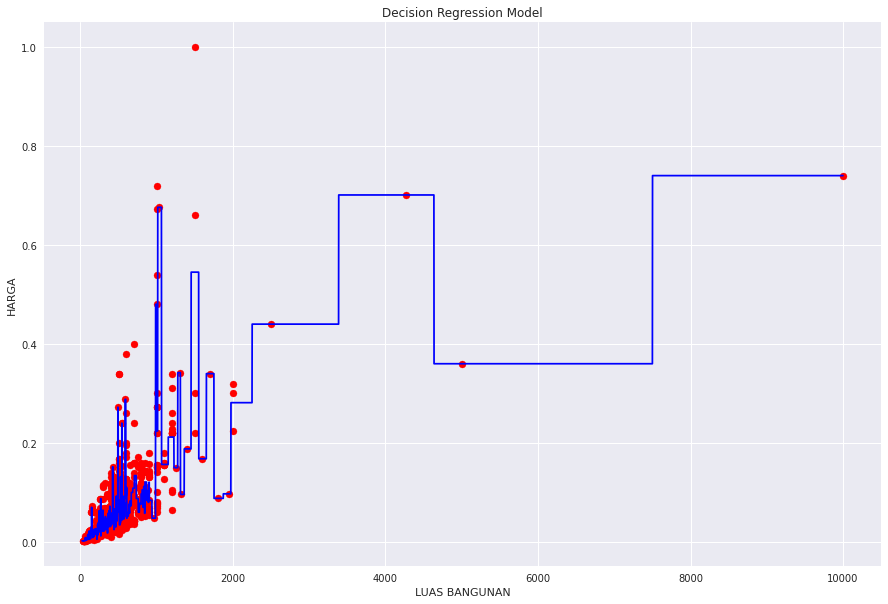

In [ ]:
regressor_contoh = DecisionTreeRegressor()

regressor_contoh.fit(df[['LB']].values,df['HARGA'].values)

plt.figure(figsize=(15,10))
X_grid = np.arange(min(df['LT'].values), max(df['LB'].values))
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(df['LB'].values,df['HARGA'].values,color='red')
plt.plot(X_grid, regressor_contoh.predict(X_grid),color='blue')
plt.title('Decision Regression Model')
plt.xlabel('LUAS BANGUNAN')
plt.ylabel('HARGA')
plt.savefig('picture1.png')
plt.show()

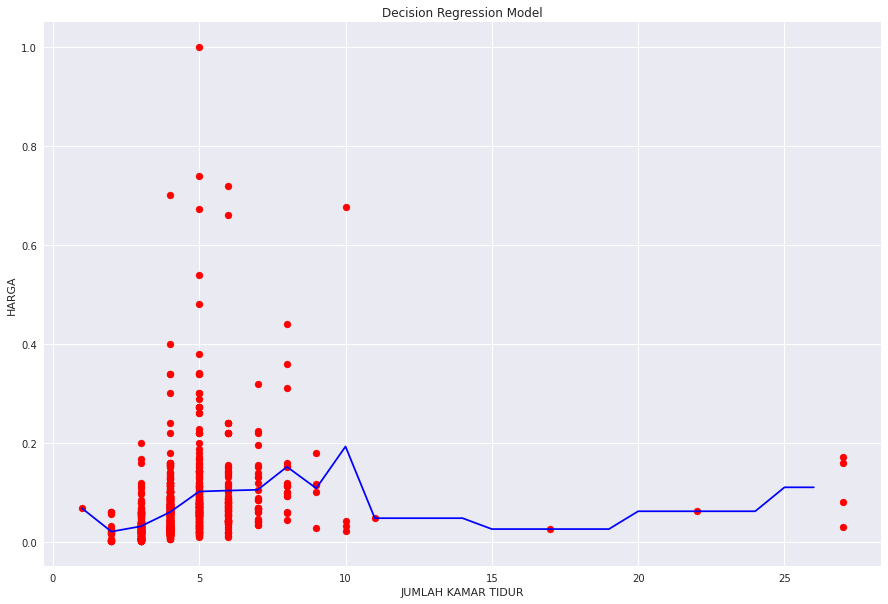

In [ ]:
regressor_contoh = DecisionTreeRegressor()

regressor_contoh.fit(df[['JKT']].values,df['HARGA'].values)

plt.figure(figsize=(15,10))
X_grid = np.arange(min(df['JKT'].values), max(df['JKT'].values))
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(df['JKT'].values,df['HARGA'].values,color='red')
plt.plot(X_grid, regressor_contoh.predict(X_grid),color='blue')
plt.title('Decision Regression Model')
plt.xlabel('JUMLAH KAMAR TIDUR')
plt.ylabel('HARGA')
plt.savefig('picture2.png')
plt.show()

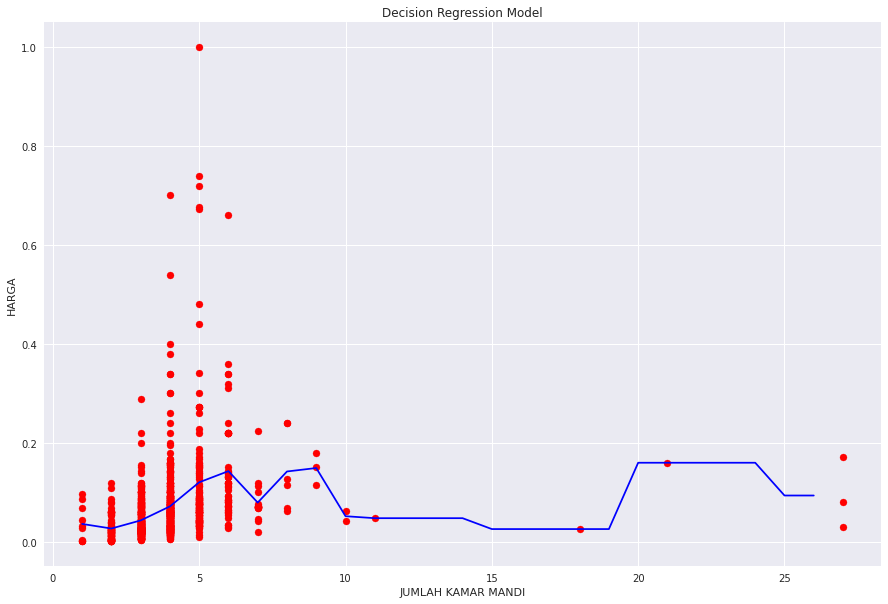

In [ ]:
regressor_contoh = DecisionTreeRegressor()

regressor_contoh.fit(df[['JKM']].values,df['HARGA'].values)

plt.figure(figsize=(15,10))
X_grid = np.arange(min(df['JKM'].values), max(df['JKM'].values))
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(df['JKM'].values,df['HARGA'].values,color='red')
plt.plot(X_grid, regressor_contoh.predict(X_grid),color='blue')
plt.title('Decision Regression Model')
plt.xlabel('JUMLAH KAMAR MANDI')
plt.ylabel('HARGA')
plt.savefig('picture3.png')
plt.show()

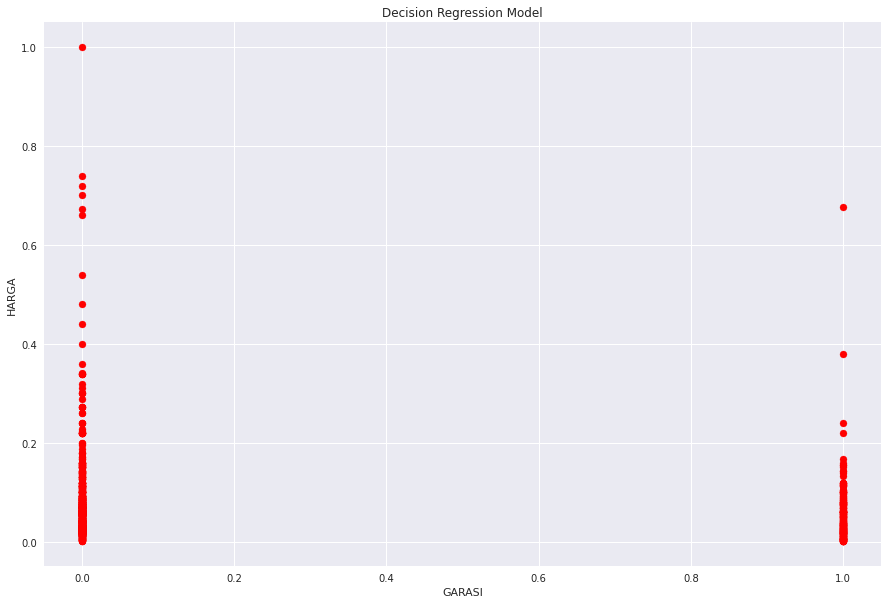

In [ ]:
regressor_contoh = DecisionTreeRegressor()

regressor_contoh.fit(df[['GRS']].values,df['HARGA'].values)

plt.figure(figsize=(15,10))
X_grid = np.arange(min(df['GRS'].values), max(df['GRS'].values))
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(df['GRS'].values,df['HARGA'].values,color='red')
plt.plot(X_grid, regressor_contoh.predict(X_grid),color='blue')
plt.title('Decision Regression Model')
plt.xlabel('GARASI')
plt.ylabel('HARGA')
plt.savefig('picture4.png')
plt.show()

In [ ]:
LT=input('LT =')
LB=input('LB =')
JKT=input('JKT=')
JKM=input('JKM=')
GRS=input('GRS=')
val = regressor.predict(np.array([LT,LB,JKT,JKM,GRS]).reshape(-1,5))
val_new=val*250000000000
print('Prediksi :')

pd.DataFrame({'LT': LT,'LB':LB,'JKT':JKT,'JKM':JKM,'GRS':GRS,'Prediksi':val_new})


LT =997
LB =786
JKT=6
JKM=3
GRS=1
Prediksi :


,LT,LB,JKT,JKM,GRS,Prediksi
0,997,786,6,3,1,2.900000e+10
